# Question 2

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:693: RuntimeWarning: divide by zero encountered in divide
  gd = np.real(num / den) - a.size + 1
/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:693: RuntimeWarning: invalid value encountered in divide
  gd = np.real(num / den) - a.size + 1
<ipython-input-15-6c489c36ebc9>:14: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  omega, d = signal.group_delay((num, den))


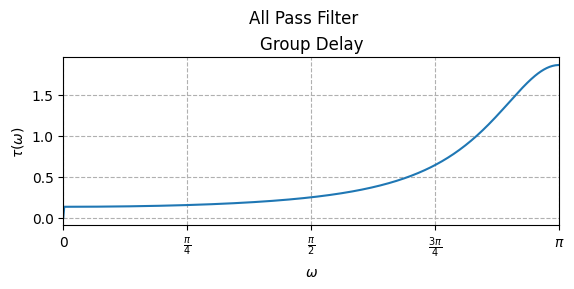

In [15]:
# code is avalaible in dsp classroom

import numpy as np
import scipy as sc
from scipy import signal
import math
import cmath
import matplotlib.pyplot as plt

# Disable LaTeX rendering
plt.rcParams['text.usetex'] = False

num = [0.211, -0.211]
den = [1, 0.57735]
omega, h = signal.freqz(num, den)
omega, d = signal.group_delay((num, den))
phasewrap = np.zeros(512)
for i in range(512):
    phasewrap[i] = cmath.phase(h[i])

plt.subplot(2, 1, 1)
plt.plot(omega, d)
plt.xlim([0, math.pi])
plt.title('Group Delay')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\tau(\omega)$')
plt.xticks(np.arange(0, 5 * math.pi / 4, math.pi / 4), ['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$'])
plt.grid(linestyle='dashed')

plt.suptitle('All Pass Filter')

plt.show()


# Question *3*

In [7]:
import numpy as np
import matplotlib.pyplot as plt



In [8]:
#function to dot product two np arr
def dot_product(a, b):
    return a*b

# function to do element wise sum of np arr and making sure if size are not equal, then pad with zeros
def sum_arr(a, b):
    if len(a) > len(b):
        b = np.pad(b, (0, len(a) - len(b)), 'constant')
    elif len(b) > len(a):
        a = np.pad(a, (0, len(b) - len(a)), 'constant')
    return a + b

In [9]:
# function to shift np arr by n also keep the last shifted element
def shift_arr(a, n):
    if n == 0:
        return a
    else:
        return np.pad(a, (n, 0), 'constant')[:-n]


In [10]:
# reverse the given array for given n form 0 to n
def reverse_arr(a, n):
    temp = a[:n]
    temp = temp[::-1]
    a[:n] = temp
    return a


Enter the value of M: 6
Enter K1: 5
Enter K2: 10
Enter K3: -5
Enter K4: -10
Enter K5: 7
Impulse response (h[n]):
[ 1.000e+00 -1.500e+01  2.000e+03  1.664e+04  3.750e+02  7.000e+00]


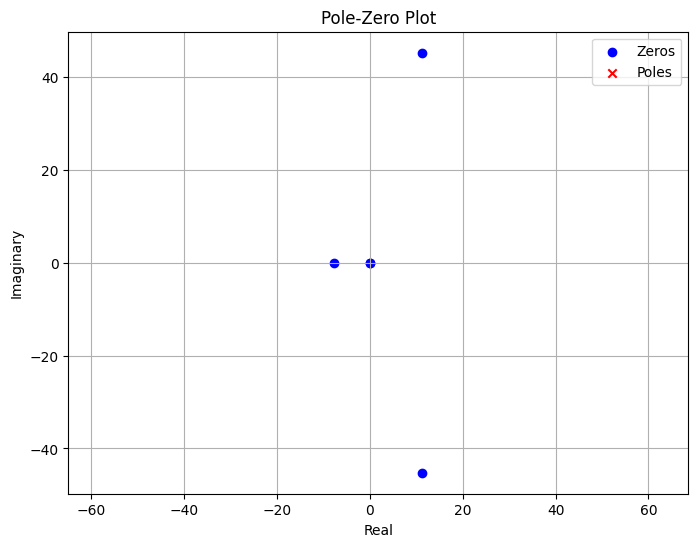

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def lattice_to_fir(M, K):
    # making array of ones
    a = np.zeros(M)
    b = np.zeros(M)
    a[0] = 1;
    b[0] = 1;

    for m in range(1,M):
        temp = b*K[m-1] # dot product of K and b
        temp = shift_arr(temp.copy(), 1) # shift by 1
        a = sum_arr(a.copy(), temp.copy())
        b = reverse_arr(a.copy(), m+1)

    return a

def pole_zero_plot(h):
    zeros = np.roots(h)
    poles = np.array([])  # No poles for an FIR filter

    plt.figure(figsize=(8, 6))
    plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='b', label='Zeros')
    plt.scatter(np.real(poles), np.imag(poles), marker='x', color='r', label='Poles')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Pole-Zero Plot')
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.show()

def main():
    M = int(input("Enter the value of M: "))
    Kis = [float(input(f"Enter K{i + 1}: ")) for i in range(M - 1)]

    h = lattice_to_fir(M,Kis)

    print("Impulse response (h[n]):")
    print(h)

    pole_zero_plot(h)

if __name__ == "__main__":
    main()
